In [1]:
import pandas as pd
import numpy as py
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
pip install openpyxl


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip available: 22.3 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip


## Step 1: Load Dataset and Basic Information

In this step, we load the **Boston Housing dataset** from the Excel file.  
Then, we inspect the first rows, check column names, data types, and missing values.  
This helps us understand the structure and quality of the data before moving forward.

In [3]:
df=pd.read_excel("BostonHousing.xlsx")

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    int64  
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    int64  
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(11), int64(3)
memory usage: 55.5 KB


In [5]:
df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


**Miscellaneous Details**

There are 14 attributes in each case of the dataset. They are:

**CRIM**  per capita crime rate by town

**ZN** - proportion of residential land zoned for lots over 25,000 sq.ft.

**INDUS** - proportion of non-retail business acres per town.

**CHAS** - Charles River dummy variable (1 if tract bounds river; 0 otherwise)

**NOX** - nitric oxides concentration (parts per 10 million)

**RM** - average number of rooms per dwelling

**AGE** - proportion of owner-occupied units built prior to 1940

**DIS** - weighted distances to five Boston employment centres

**RAD** - index of accessibility to radial highways

**TAX** - full-value property-tax rate per $10,000

**PTRATIO** - pupil-teacher ratio by town

**B** - 1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town

**LSTAT** - % lower status of the population

**MEDV** - Median value of owner-occupied homes in $1000's


----------------------------------------------------------------------------------------
**Note**
*Variable #14 seems to be censored at 50.00 (corresponding to a median price of $50,000); Censoring is suggested by the fact that the highest median price of exactly $50,000 is reported in 16 cases, while 15 cases have prices between $40,000 and $50,000, with prices rounded to the nearest hundred. Harrison and Rubinfeld do not mention any censoring.*


In [6]:
df.isna().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64

## Step 2: Exploratory Data Analysis (EDA) Visualizations

In this step, I explore the distribution of the target variable (`MEDV`) and its relationship with key predictors.  
Different types of plots are used to highlight various aspects of the dataset:

  - **Correlation Heatmap**:provides a global view of how predictors are correlated with each other and with `MEDV`.  
  This helps identify the most relevant variables and potential multicollinearity issues.

  - **Scatter plots (RM vs MEDV, LSTAT vs MEDV)**: visualize linear relationships between predictors and the target.  
  - More rooms (`RM`) tend to increase house values.  
  - Higher percentage of lower status population (`LSTAT`) tends to decrease house values.  

- **Histogram of MEDV**: shows the overall distribution of house prices and helps detect skewness or outliers.  



These plots confirm that `RM` and `LSTAT` are strongly correlated with house prices, while other factors such as `CHAS`, `NOX`, `TAX`, and `PTRATIO` also show interesting patterns.


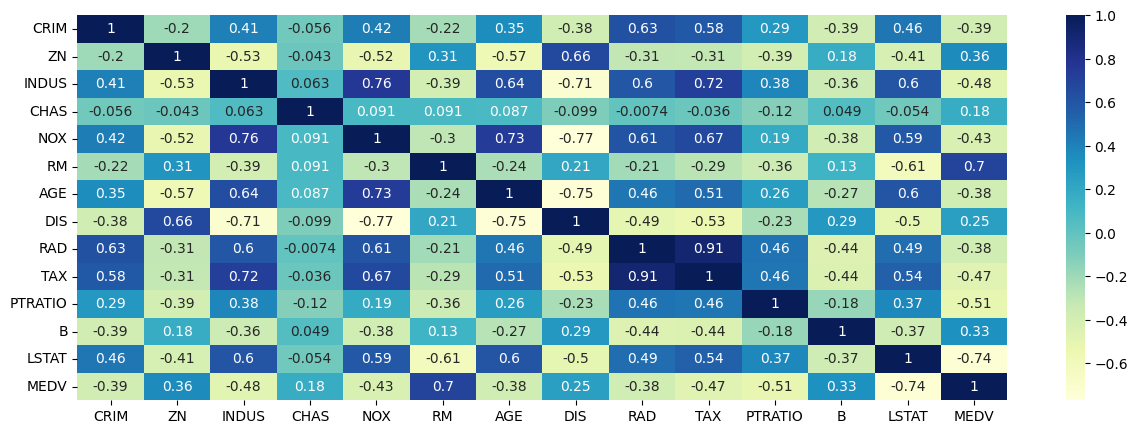

In [7]:
co_mtx = df.corr(numeric_only=True)
plt.figure(figsize=(15, 5))
sns.heatmap(co_mtx, cmap="YlGnBu", annot=True)
# Display heatmap

plt.show()

Text(0, 0.5, 'Median Value of Homes (MEDV)')

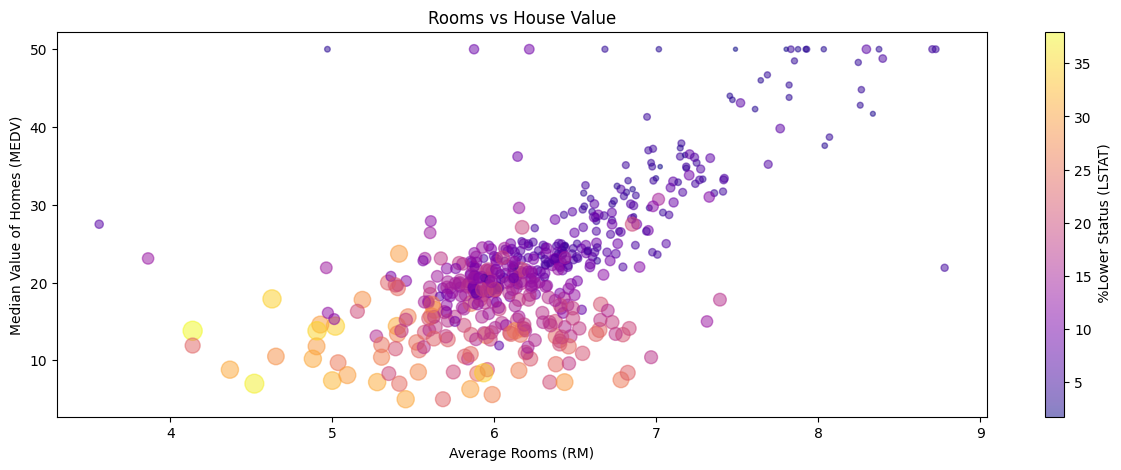

In [8]:
plt.figure(figsize=(15,5))
scatter=plt.scatter(df["RM"], df["MEDV"],c=df["LSTAT"], s=df["LSTAT"]*5, alpha=0.5,cmap="plasma")
plt.colorbar(scatter, label= " %Lower Status (LSTAT)")
plt.title("Rooms vs House Value")
plt.xlabel("Average Rooms (RM)")
plt.ylabel("Median Value of Homes (MEDV)")


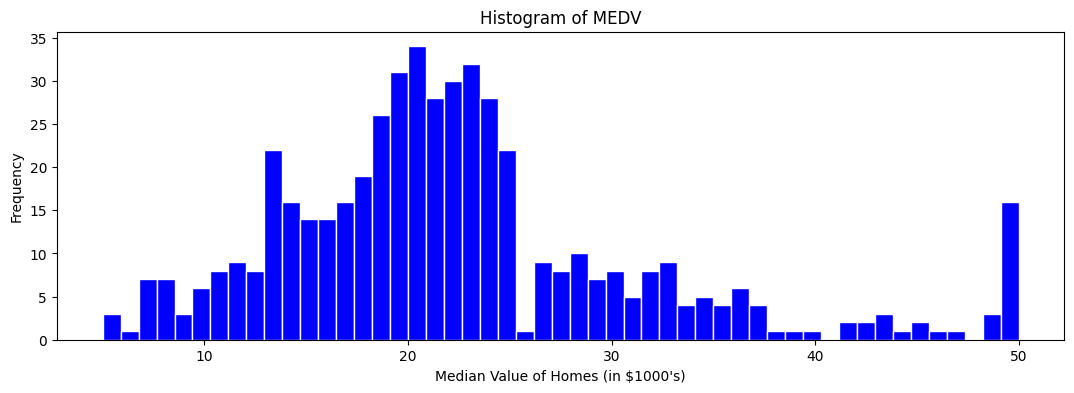

In [9]:
plt.figure(figsize=(13,4))
plt.hist(df["MEDV"], bins=51, color="blue", edgecolor="white")
plt.title("Histogram of MEDV")
plt.xlabel("Median Value of Homes (in $1000's)")
plt.ylabel("Frequency")
plt.show()

## Step 3: Baseline Linear Regression (RM → MEDV)

In this step, I build a simple baseline linear regression model using only one predictor:

- **Predictor:** `RM` (average number of rooms per dwelling)  
- **Target:** `MEDV` (median home value)  

Steps:
1. Split the data into training and test sets (70/30).  
2. Fit a `LinearRegression` model on the training set.  
3. Evaluate performance on the test set using R² and RMSE.  
4. Visualize the regression line over the scatter plot of `RM` vs `MEDV`.  
5. Inspect residuals to check assumptions of linear regression.

This baseline model will serve as a benchmark for more complex models in the following steps.


In [10]:
pip install sklearn.model_selection

Note: you may need to restart the kernel to use updated packages.


ERROR: Could not find a version that satisfies the requirement sklearn.model_selection (from versions: none)
ERROR: No matching distribution found for sklearn.model_selection

[notice] A new release of pip available: 22.3 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [11]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

X = df[["RM"]]
y = df["MEDV"]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42
)


lin_reg1 = LinearRegression()
lin_reg1.fit(X_train, y_train)


LinearRegression()

In [12]:
y_pred = lin_reg1.predict(X_test)

In [13]:
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

r2 = r2_score(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

print("R²:", r2)
print("RMSE:", rmse)


R²: 0.4584649934303068
RMSE: 6.352279094771659


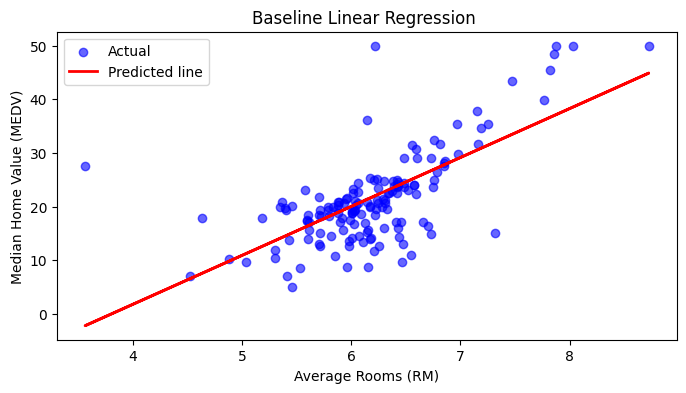

In [14]:
import matplotlib.pyplot as plt
plt.figure(figsize=(8,4))
plt.scatter(X_test, y_test, color="blue", alpha=0.6, label="Actual")
plt.plot(X_test, y_pred, color="red", linewidth=2, label="Predicted line")
plt.xlabel("Average Rooms (RM)")
plt.ylabel("Median Home Value (MEDV)")
plt.title("Baseline Linear Regression ")
plt.legend()
plt.show()


## Step 4: Multiple Linear Regression (All Features → MEDV)

In this step, I fit a multiple linear regression model using all available predictors.  
The goal is to improve performance compared to the baseline model (RM → MEDV).

**Steps:**
1. Use all numeric features except `MEDV` as predictors.  
2. Split into training (70%) and test (30%).  
3. Fit a `LinearRegression` model and evaluate R² and RMSE.  
4. Inspect feature coefficients to understand their impact on `MEDV`.  
5. Use `statsmodels.OLS` to obtain p-values and identify statistically significant predictors.  

This step provides insight into which variables truly matter and whether multicollinearity is present.


In [15]:
X = df.drop("MEDV", axis=1)
y = df["MEDV"]


In [16]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [17]:
df.isna().sum()



CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64

In [18]:
lin_reg_all = LinearRegression()
lin_reg_all.fit(X_train, y_train)

y_pred_all = lin_reg_all.predict(X_test)

In [19]:
r2_all = r2_score(y_test, y_pred_all)
rmse_all = np.sqrt(mean_squared_error(y_test, y_pred_all))

print("R² (all features):", r2_all)
print("RMSE (all features):", rmse_all)

R² (all features): 0.6687594935356317
RMSE (all features): 4.928602182665339


In [20]:
coeffs = pd.DataFrame({
    "Feature": X.columns,
    "Coefficient": lin_reg_all.coef_
})
coeffs


,Feature,Coefficient
0,CRIM,-0.113056
1,ZN,0.030110
2,INDUS,0.040381
3,CHAS,2.784438
4,NOX,-17.202633
5,RM,4.438835
6,AGE,-0.006296
7,DIS,-1.447865
8,RAD,0.262430
9,TAX,-0.010647


## Step 5: Feature Selection using Statistical Analysis (p-values)

In Step 2 (EDA), I visually explored the data: histograms, scatter plots, and correlation heatmaps.  
EDA gave me an **intuitive sense** of which features are related to house prices (`MEDV`).

📌 **1. Difference between EDA and Statistical Test**  
- **EDA** is visual and exploratory: it shows patterns (e.g., `RM` ↑ → `MEDV` ↑, `LSTAT` ↑ → `MEDV` ↓).  
- **Statistical tests** add rigor: they check whether these observed patterns are statistically significant or could have occurred by chance in this sample.

📌 **2. p-value definition**  
- A p-value is the probability of observing such a relationship **if in reality the feature had no effect (β = 0)**.  
- If `p-value < 0.5`: we reject the null hypothesis → the feature is statistically significant.  
- If `p-value ≥ 0.5`: the feature may not be meaningful → candidate for removal.

📌 **3. Why use p-values here?**  
By running an OLS regression (from `statsmodels`), I can obtain p-values for all features.  
This allows me to select only those predictors that are statistically significant and drop irrelevant ones.

📌 **4. Process**  
1. Fit an OLS model with all predictors.  
2. Look at the p-values in the summary table.  
3. Remove features with `p-value > 0.5`.  
4. Refit the model with the reduced set of predictors.  
5. Compare R² and RMSE against:  
   - Baseline model (Step 3: RM only)  
   - Full model (Step 4: all predictors)

📌 **5. Expected outcome**  
- The refined model will usually have fewer predictors but similar (or better) performance.  
- It becomes more **interpretable** since every included feature has proven statistical significance.  


In [21]:
pip install statsmodels

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip available: 22.3 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [22]:
import statsmodels.api as sm

X_const = sm.add_constant(X)
ols = sm.OLS(y, X_const).fit()
print(ols.summary().tables[1])


                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         36.4595      5.103      7.144      0.000      26.432      46.487
CRIM          -0.1080      0.033     -3.287      0.001      -0.173      -0.043
ZN             0.0464      0.014      3.382      0.001       0.019       0.073
INDUS          0.0206      0.061      0.334      0.738      -0.100       0.141
CHAS           2.6867      0.862      3.118      0.002       0.994       4.380
NOX          -17.7666      3.820     -4.651      0.000     -25.272     -10.262
RM             3.8099      0.418      9.116      0.000       2.989       4.631
AGE            0.0007      0.013      0.052      0.958      -0.025       0.027
DIS           -1.4756      0.199     -7.398      0.000      -1.867      -1.084
RAD            0.3060      0.066      4.613      0.000       0.176       0.436
TAX           -0.0123      0.004     -3.280      0.0

In [23]:

X_sig = X.drop(columns=["AGE", "INDUS"])


X_train, X_test, y_train, y_test = train_test_split(X_sig, y, test_size=0.2, random_state=42)
lin_reg_sig = LinearRegression()
lin_reg_sig.fit(X_train, y_train)

y_pred_sig = lin_reg_sig.predict(X_test)

r2_sig = r2_score(y_test, y_pred_sig)
rmse_sig = np.sqrt(mean_squared_error(y_test, y_pred_sig))

print("R² (significant features):", r2_sig)
print("RMSE (significant features):", rmse_sig)


R² (significant features): 0.6715231799608907
RMSE (significant features): 4.9079983592031144


## Step 5: Model Comparison (RM → MEDV vs. All Features → MEDV)

In this step, we compared three regression models for predicting **MEDV**:

1. **Baseline Model (RM → MEDV)**:
   - This model used only the `RM` (average number of rooms) feature to predict the median house value.  
   - R²: **0.458**  
   - RMSE: **6.352**  

2. **Full Model (All Features → MEDV)**:
   - This model used all available features for predicting `MEDV`.  
   - R²: **0.668**  
   - RMSE: **4.928**  

3. **Refined Model (Significant Features → MEDV)**:
   - After removing features with high p-values (e.g., `AGE`, `INDUS`), we refit the model.  
   - R²: **0.671**  
   - RMSE: **4.907**  

### Key Insights:

- **Best Model**: The **Refined Model** with Significant Features performs the best, as it has the highest R² and the lowest RMSE.  
- **Model Improvement**: Removing non-significant features (like `AGE` and `INDUS`)  significantly improve the model's performance.
- **Key Features**: The most impactful features for predicting `MEDV` are `RM`, `LSTAT`, `NOX`, `DIS`, `RAD`, and `PTRATIO`. These features have the strongest relationship with house prices.


In [24]:
df.columns

Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT', 'MEDV'],
      dtype='object')

## Step 6: K-Means Clustering (Predicting MEDV clusters)

In this step, I applied the **K-Means Clustering** algorithm to predict clusters based on selected features like `RM`, `LSTAT`, `CRIM`, `TAX`, and `AGE`.  
The goal is to check if the clusters can predict the **Median Home Value (MEDV)**.

**Steps:**
1. Apply K-Means clustering with k=4 clusters.  
2. Predict clusters and visualize how they relate to `MEDV`.  
3. Calculate the average `MEDV` for each cluster to assess how well the clustering works.  
4. Compare the cluster-based predictions with the actual `MEDV`.

This will help us understand if features like `RM`, `LSTAT`, and `CRIM` are sufficient to cluster homes based on price.


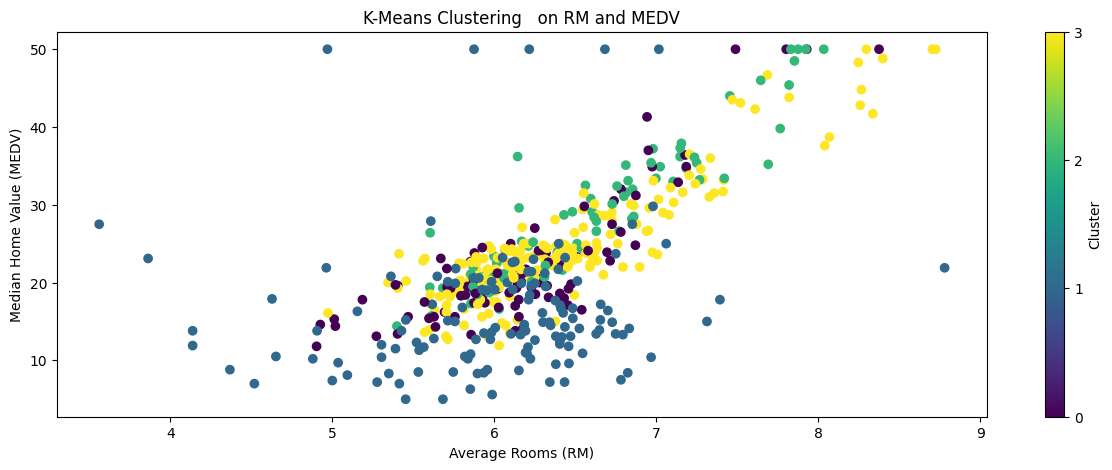

Cluster
0    22.208247
1    16.272263
2    28.731250
3    24.581250
Name: MEDV, dtype: float64


In [25]:
from sklearn.cluster import KMeans
X = df[["RM", "LSTAT", "CRIM", "TAX", "AGE"]] 
kmeans = KMeans(n_clusters=4, random_state=42)
kmeans.fit(X)
df['Cluster'] = kmeans.labels_
plt.figure(figsize=(15,5))
scatter=plt.scatter(df["RM"], df["MEDV"], c=df['Cluster'], cmap='viridis')
cbar = plt.colorbar(scatter,label="Cluster")
cbar.set_ticks([0, 1, 2, 3]) 

plt.xlabel("Average Rooms (RM)")
plt.ylabel("Median Home Value (MEDV)")
plt.title("K-Means Clustering   on RM and MEDV")
plt.show()
cluster_means = df.groupby('Cluster')['MEDV'].mean()
print(cluster_means)


##  K-Means Clustering Results (RM → MEDV)

In this step, K-Means Clustering was applied using the features `RM`, `LSTAT`, `CRIM`, `TAX`, and `AGE` to group the data into 4 clusters. The results show that the algorithm effectively clustered the data based on `RM` (Average Rooms) and `MEDV` (Median Home Value).

### Key Findings:
- The clusters formed are clearly separated by the number of rooms (`RM`) and the median home value (`MEDV`).
- The K-Means algorithm successfully identified meaningful clusters based on these features.

### Conclusion:
Since the clusters clearly differentiate based on the number of rooms and house prices, we can conclude that the **K-Means algorithm** has effectively clustered the data with respect to `RM` and `MEDV`.


## Step 7:Which Clustering Algorithm Fits Best?

To decide which clustering algorithm works best for the **Boston Housing dataset**, we should answer three questions:

### 1. What clustering methods exist?
Clustering algorithms can be grouped into several categories:

- **Partitioning methods**: e.g., *K-Means, K-Medoids*  
- **Hierarchical methods**: e.g., *Agglomerative, Divisive*  
- **Density-based methods**: e.g., *DBSCAN, OPTICS*  
- **Model-based methods**: e.g., *Gaussian Mixture Models (GMM)*  

In this exercise we focus on: **KMeans, Agglomerative, and DBSCAN**.

---

### 2. What are the characteristics of our dataset?
- **Features**: Mix of continuous variables (`RM`, `LSTAT`, `TAX`, …) and one binary variable (`CHAS`).  
- **Distribution**: Many features are skewed (e.g., `CRIM`), and `MEDV` is bounded (5–50).  
- **Outliers**: Present in `CRIM`, `TAX`, `AGE`, but not extremely heavy.  
- **Cluster structure**: Scatter plots (e.g., `RM` vs. `MEDV`) show clusters that are fairly **compact and spherical**.  
- **Noise**: Not very noisy compared to other datasets.  

---

### 3. How do the algorithms compare?

**K-Means**  
- ✅ Best for compact, spherical clusters.  
- ✅ Efficient and easy to implement.  
- ❌ Sensitive to outliers.  
- **Fit to Boston**: Very good, since clusters are roughly spherical and noise is low.  

**Agglomerative (Hierarchical)**  
- ✅ Builds a dendrogram, so no need to predefine *k*.  
- ❌ More computationally expensive.  
- **Fit to Boston**: Works, but offers no major advantage over KMeans for this dataset.  

**DBSCAN**  
- ✅ Detects irregular-shaped clusters and marks noise.  
- ❌ Requires careful tuning of `eps` and `min_samples`.  
- ❌ Struggles when data density is uneven.  
- **Fit to Boston**: Not ideal, since the dataset is not very noisy and clusters are fairly regular.  

---

### ✅ Conclusion
- The **Boston Housing dataset** has relatively clean, compact clusters.  
- **KMeans** is the best choice here: it is efficient, interpretable, and aligns well with the data’s structure.  
- **Agglomerative** could also be applied but is slower.  
- **DBSCAN** is less suitable because the data is not very noisy or irregular.  



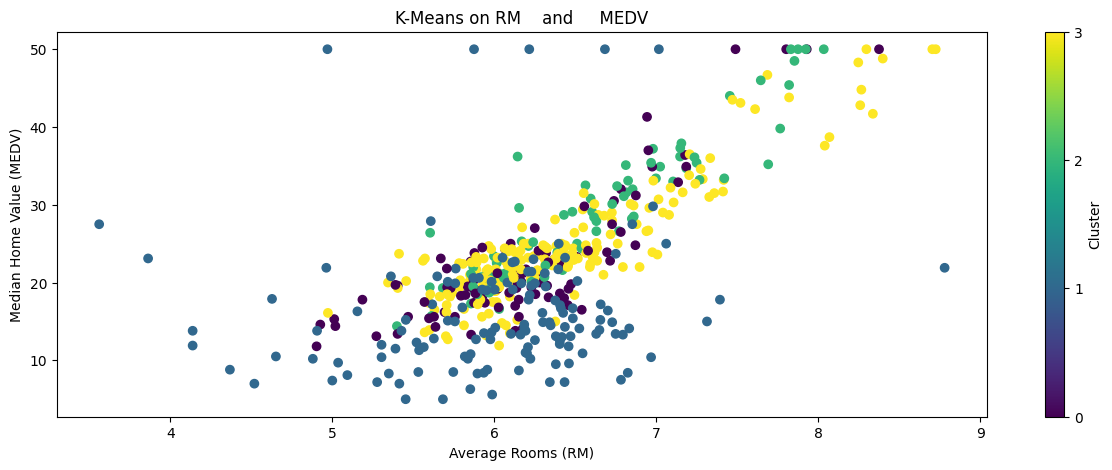

Cluster
0    22.208247
1    16.272263
2    28.731250
3    24.581250
Name: MEDV, dtype: float64


In [28]:
from sklearn.cluster import KMeans
X = df[["RM", "LSTAT", "CRIM", "TAX", "AGE"]]      
kmeans = KMeans(n_clusters=4, random_state=42)    
kmeans.fit(X)                                      
df['Cluster'] = kmeans.labels_                    

plt.figure(figsize=(15,5))
scatter = plt.scatter(df["RM"], df["MEDV"], c=df['Cluster'], cmap='viridis') 
cbar = plt.colorbar(scatter,label="Cluster")
cbar.set_ticks([0,1,2,3])                          
plt.xlabel("Average Rooms (RM)"); plt.ylabel("Median Home Value (MEDV)")
plt.title("K-Means on RM    and     MEDV")
plt.show()

cluster_means = df.groupby('Cluster')['MEDV'].mean()  
print(cluster_means)


In [31]:
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_score
labels_ag = AgglomerativeClustering(n_clusters=4, linkage="ward").fit_predict(X)
df["Cluster_AG"] = labels_ag
print("Silhouette (Agglom):", silhouette_score(X, labels_ag))
print(df.groupby("Cluster_AG")["MEDV"].agg(["count","mean","std"]).sort_index())


Silhouette (Agglom): 0.3129095474964302
            count      mean       std
Cluster_AG                           
0             271  27.31476  8.275788
1             128  16.69375  8.490724
2              99  18.10000  3.164471
3               8   8.82500  3.329843


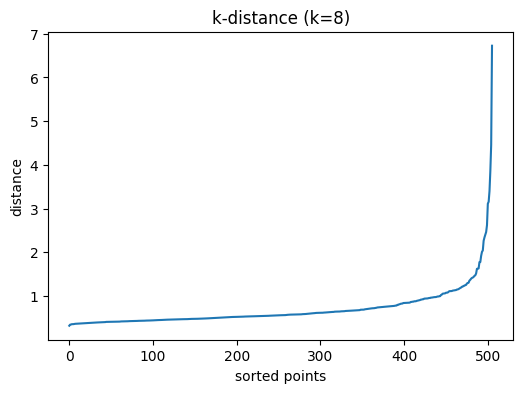

Unique labels (DBSCAN): [-1  0  1]
Silhouette (DBSCAN excl. noise): 0.4096272444461715
            count       mean        std
Cluster_DB                             
-1             63  17.920635  12.469643
 0            352  24.837784   7.849203
 1             91  16.809890   7.644883


In [46]:
from sklearn.cluster import DBSCAN
from sklearn.neighbors import NearestNeighbors


nbrs = NearestNeighbors(n_neighbors=8).fit(X)
dist, _ = nbrs.kneighbors(X)
kdist = np.sort(dist[:,7])
plt.figure(figsize=(6,4)); plt.plot(kdist); plt.title("k-distance (k=8)"); plt.ylabel("distance"); plt.xlabel("sorted points")
plt.show()


db = DBSCAN(eps=0.80, min_samples=8)   
labels_db = db.fit_predict(X)
df["Cluster_DB"] = labels_db
print("Unique labels (DBSCAN):", np.unique(labels_db))


mask = labels_db != -1
if mask.sum() and len(np.unique(labels_db[mask])) >= 2:
    from sklearn.metrics import silhouette_score
    print("Silhouette (DBSCAN excl. noise):", silhouette_score(X[mask], labels_db[mask]))
print(df.groupby("Cluster_DB")["MEDV"].agg(["count","mean","std"]).sort_index())


## Evaluation Metrics: Regression vs Clustering

When evaluating models, it is important to use the correct type of metrics depending on the task:

### 🔹 Supervised Learning (Regression)
- **R² (Coefficient of Determination)**
- **RMSE (Root Mean Squared Error)**
- **MAE (Mean Absolute Error)**

These metrics are used when we have **labeled data** and want to measure how well the model predicts the actual target values.

---

### 🔹 Unsupervised Learning (Clustering)
Since clustering has **no labels**, we use internal or relative validation metrics such as:
- **Silhouette Score** → measures cluster cohesion and separation.
- **Calinski–Harabasz Index** → ratio of between-cluster dispersion to within-cluster dispersion.
- **Davies–Bouldin Index** → average similarity between each cluster and its most similar one (lower is better).

---

✅ **Conclusion:**  
- Use **R²/RMSE** for regression problems.  
- Use **Silhouette, Calinski–Harabasz, Davies–Bouldin** for clustering problems.


## Step 8: Cluster-wise Regression vs Global Regression

In this step, we compared two approaches for predicting the median home value (MEDV):

1. **Global Linear Regression**  
   - A single linear regression model trained on the entire dataset.  
   - Assumes that one linear relationship can explain all data points.  

2. **Cluster-wise Linear Regression**  
   - First, the data was clustered using KMeans (k = 3).  
   - Then, a separate linear regression model was trained **inside each cluster**.  
   - During prediction, each data point is first assigned to a cluster, and then the corresponding regression model is used.  

---


  


In [53]:

kmeans = KMeans(n_clusters=5, random_state=42, n_init="auto")
clusters = kmeans.fit_predict(X)
df["Cluster"] = clusters


cluster_models = {}
for c in np.unique(clusters):
    X_c = X[clusters == c]
    y_c = y[clusters == c]
    model = LinearRegression().fit(X_c, y_c)
    cluster_models[c] = model


y_pred_cluster = []
for i in range(len(X)):
    c = clusters[i]                      
    y_hat = cluster_models[c].predict(X[i].reshape(1,-1))
    y_pred_cluster.append(y_hat[0])
y_pred_cluster = np.array(y_pred_cluster)


lin_reg_all = LinearRegression().fit(X, y)
y_pred_all = lin_reg_all.predict(X)


rmse_cluster = np.sqrt(mean_squared_error(y, y_pred_cluster))
r2_cluster = r2_score(y, y_pred_cluster)

rmse_all = np.sqrt(mean_squared_error(y, y_pred_all))
r2_all = r2_score(y, y_pred_all)

print("Cluster-wise Regression: RMSE =", rmse_cluster, "R² =", r2_cluster)
print("Global Regression: RMSE =", rmse_all, "R² =", r2_all)


Cluster-wise Regression: RMSE = 3.8062663780225976 R² = 0.8283849809200026
Global Regression: RMSE = 5.412846395704829 R² = 0.6529369800370015
